# Import modules

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import data

In [37]:
whole_metadata_merge = pd.read_csv(pwd + 'data/prepare_HCC_data/whole_metadata_merge.csv', sep=',', decimal='.', na_values='NA')
whole_metadata_merge

,country,Center,Idepic_Bio,Idepic_Samp,sample_ID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.15873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,LivCan_544,NaN,52568391-s2#C,Incident,52568391.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,LivCan_545,NaN,61077734-s2#C,Non-case,61077734.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN,LivCan_546,NaN,61077869-s2#C,Incident,61077869.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,41.0,41____41020331,NaN,LivCan_297,NaN,41020331-s2#C,Incident,41020331.0,41____41020331,...,0.0,-0.088249,-0.438249,0.645165,0.0,0.0,0.0,0.0,0.0,0.80000


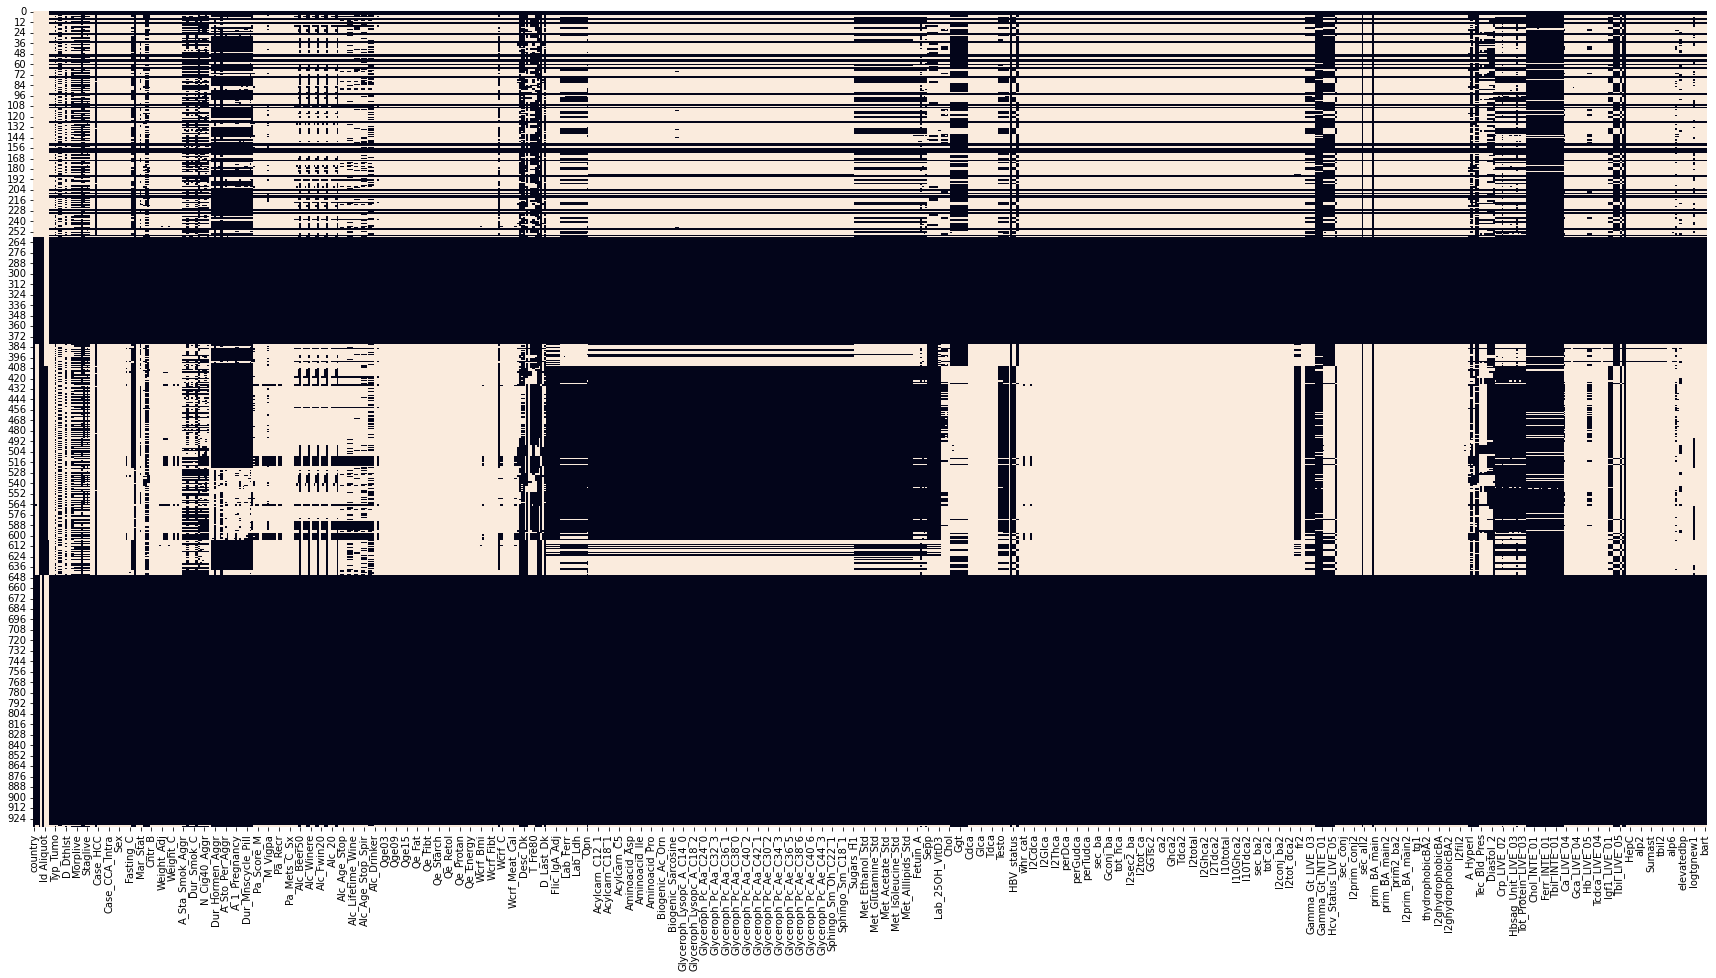

In [38]:
plt.figure(figsize=(30,15))
sns.heatmap(whole_metadata_merge.notna(), cbar=False);

# Convert metadata rtf file to csv file for easier manipulation

## Read raw rtf file

In [69]:
from striprtf.striprtf import rtf_to_text

with open(pwd + 'data/prepare_HCC_data/Data_Dict_Live_Caco.rtf') as infile:
    content = infile.read()
    dict_metadata = rtf_to_text(content)

## Parse rtf file and convert to dataframe

In [75]:
import sys
from io import StringIO


dict_metadata_str = StringIO(dict_metadata)

df_metadata = pd.read_csv(dict_metadata_str, sep='|').drop('Unnamed: 8', axis=1)
print(df_metadata.shape)
df_metadata.iloc[:50,:]

(802, 8)


,#,Variable,Label,Type,Length,Format,Value code,Value label
0,114.0,A_1_Ftp,Age at first full term pregnancy,Num,8.0,3.,NaN,NaN
1,103.0,A_1_Per_Aggr,Age at first menstrual period (aggregated),Num,8.0,3.,NaN,NaN
2,113.0,A_1_Pregnancy,Age at first of all pregnancy,Num,8.0,3.,NaN,NaN
3,63.0,A_Gallst,Age gallstones,Num,8.0,2.,NaN,NaN
4,86.0,A_Giv_Cig_Aggr,Age give up smoking cigarettes (aggregated),Num,8.0,3.,NaN,NaN
5,85.0,A_Giv_Smok_Aggr,Age give up smoking (aggregated),Num,8.0,3.,NaN,NaN
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
8,115.0,A_Menopause,Age at menopause,Num,8.0,3.,NaN,NaN
9,105.0,A_Pill_Aggr,Age when you started using the pill (aggregated),Num,8.0,3.,NaN,NaN


## Save dataframe as csv file

In [76]:
df_metadata.to_csv(pwd + 'data/prepare_HCC_data/Data_Dict_Live_Caco.csv', index=False, header=True)